### Implement logistic regression using Python/R to perform classification on
### Social_Network_Ads.csv dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
df.shape

(400, 5)

In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

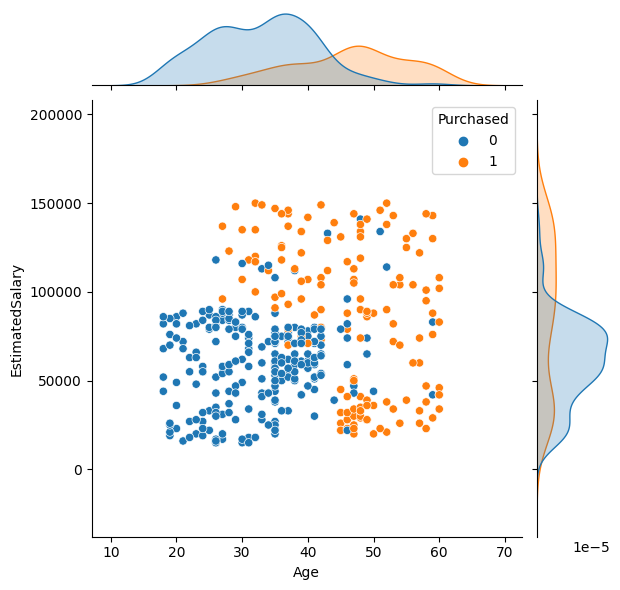

In [6]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df, hue = 'Purchased')

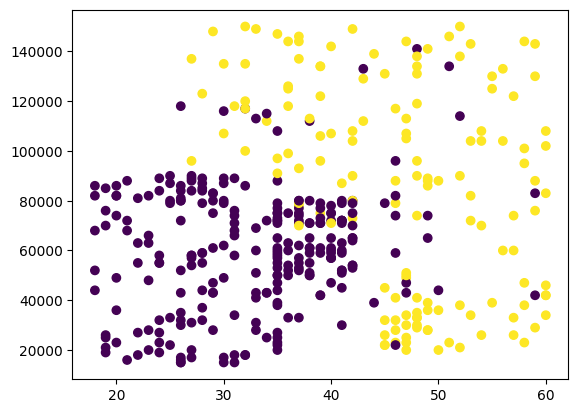

In [8]:
plt.scatter(df['Age'], df['EstimatedSalary'], c = df['Purchased'])

In [11]:
# Input Data
x = df[['Age', 'EstimatedSalary']]

# Output Data
y = df['Purchased']

In [12]:
set(y)

{0, 1}

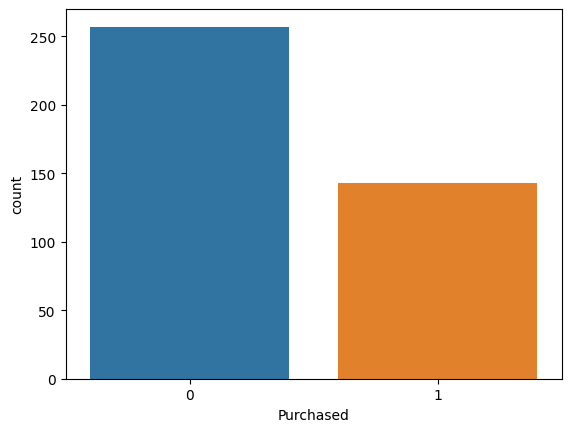

In [13]:
sns.countplot(x = y);

In [14]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [17]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [16]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [18]:
x_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

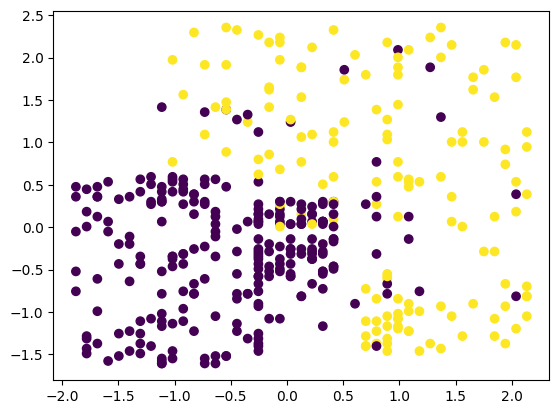

In [19]:
plt.scatter(x_scaled[:, 0], x_scaled[:,1], c = df['Purchased'])

In [21]:
pd.DataFrame(x_scaled).describe()

,0,1
count,4.000000e+02,4.000000e+02
mean,-7.105427e-17,-1.776357e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [22]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
x_scaled, y, random_state= 0, test_size= 0.25)

In [32]:
x_train.shape

(300, 2)

In [33]:
x_test.shape

(100, 2)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
classifier = LogisticRegression()

In [36]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [38]:
# Prediction on  Test Data
y_pred = classifier.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [40]:
result = pd.DataFrame({
    'actual values': y_test,
    'predicted values': y_pred
})

In [41]:
result

,actual values,predicted values
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [42]:
sum(y_test == y_pred)

89

### Compute Confusion matrix to find TP, FP, TN, FN, 
### Accuracy, Error rate, Precision, Recall on
### the given dataset

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [44]:
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[65,  3],
       [ 8, 24]])

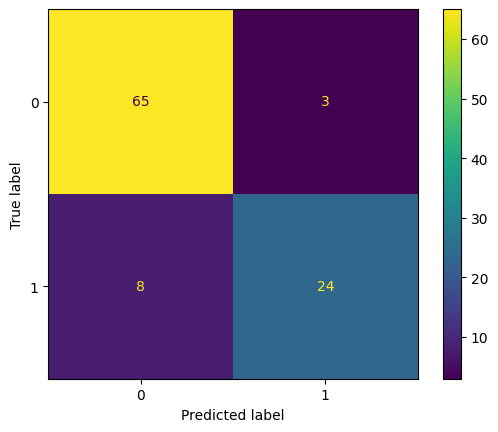

In [48]:
ConfusionMatrixDisplay(cm).plot()

In [60]:
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [61]:
accuracy_score(y_test, y_pred)

0.89

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [64]:
cm

array([[65,  3],
       [ 8, 24]])

In [ ]:
# Recall - individual class_accuracy, sensitivity

In [65]:
r0 = 65/68
r0

0.9558823529411765

In [66]:
# Recall - individual class_accuracy, sensitivity
r1 = 24/32
r1

0.75

In [71]:
pd.Series(y_pred).value_counts

<bound method IndexOpsMixin.value_counts of 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    1
99    1
Length: 100, dtype: int64>

In [72]:
# Precision -0 Positive Predictive Value
p0 =  65/73
p0

0.8904109589041096

In [73]:
# Precision -1 Negative Predictive Value
p1 = 24/27
p1

0.8888888888888888

In [74]:
# F1-Score
f0 = 2 * (p0 * r0)/(p0 + r0)
f0

0.9219858156028369

In [76]:
# F1-Score
f1 = 2 * (p1 * r1)/(p1 + r1)
f1

0.8135593220338982

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
new1 = [[45, 78000]]
new2 = [[25, 20000]]

In [83]:
classifier.predict(scaler.transform(new1))[0]

1

In [84]:
classifier.predict(scaler.transform(new2))[0]

0